# Geographics data demo

Anton Antonov  
RakuForPrediction at WordPress   
RakuForPrediction-book at GitHub   
June 2024  

-----

## Introduction

This notebook showcase the data and functionalities of Raku packages for:

- Geographic data and named entity recognition
- Geometric computations
- Data wrangling and summarization
- Visualization

Since the exposition is in a chat-enabled notebook (***chatbook***) the exposition showcases data presentation and formatting.

------

## Setup

Here are loaded the packages used in the rest of notebook:

In [84]:
use Data::Reshapers;
use Data::Summarizers;
use Data::TypeSystem;
use Data::Translators;
use Data::Geographics;
use Math::Nearest;

use DSL::Entity::Geographics;
use DSL::English::DataQueryWorkflows;

use JavaScript::D3;
use WWW::MermaidInk;

Here we prepare the notebook to visualize with JavaScript:

In [2]:
#% javascript
require.config({
     paths: {
     d3: 'https://d3js.org/d3.v7.min'
}});

require(['d3'], function(d3) {
     console.log(d3);
});

Verification:

In [3]:
#% js
js-d3-list-line-plot(10.rand xx 40, background => 'none', stroke-width => 2)

Here we set a collection of visualization variables:

In [49]:
my $title-color = 'Ivory';
my $stroke-color = 'SlateGray';
my $tooltip-color = 'LightBlue';
my $tooltip-background-color = 'none';
my $background = 'none';
my $color-scheme = 'schemeTableau10';
my $mmd-theme = '%%{ init: {\'theme\': \'forest\' } }%%';

%%{ init: {'theme': 'forest' } }%%

-------

## Country data

Here is a list of the countries the package "Data::Geographics" has data for:

In [5]:
#% html
country-data().keys.sort ==> to-html(:multicolumn, columns => 3)

Botswana,Hungary,Serbia
Brazil,Iran,Slovakia
Bulgaria,Iraq,SouthAfrica
Canada,Japan,SouthKorea
China,Mexico,Spain
CzechRepublic,NorthKorea,Sweden
Denmark,Poland,Turkey
Finland,Romania,Ukraine
France,Russia,UnitedStates
Germany,SaudiArabia,(Any)


In [6]:
#% html
country-data.head.value.keys.sort.List
==> to-html(:multicolumn, columns => 5, align => 'left')

AMRadioStations,ElderlyPopulation,GovernmentConsumption,MaleElderlyPopulation,PavedAirportLengths
AdultPopulation,ElectricalGridFrequency,GovernmentDebt,MaleInfantMortalityFraction,PavedAirports
AgriculturalProducts,ElectricalGridPlugs,GovernmentExpenditures,MaleLifeExpectancy,PavedRoadLength
AgriculturalValueAdded,ElectricalGridSockets,GovernmentReceipts,MaleLiteracyFraction,PhoneLines
Airports,ElectricalGridVoltages,GovernmentSurplus,MaleMedianAge,Pipelines
AlternateNames,ElectricityConsumption,GrossInvestment,MalePopulation,Population
AlternateStandardNames,ElectricityExports,HIVAIDSDeathRateFraction,ManufacturingValueAdded,PopulationGrowth
AnnualBirths,ElectricityImports,HIVAIDSFraction,MaritimeClaims,PovertyFraction
AnnualDeaths,ElectricityProduction,HIVAIDSPopulation,MedianAge,PriceIndex
AnnualHIVAIDSDeaths,EnvironmentalAgreements,HighestElevation,MerchantShipTypes,RadioStations
ArableLandArea,EnvironmentalIssues,HighestPoint,MerchantShips,RailwayGaugeLengths


In [7]:
#% html
my @field-names = <Name FullNativeName ISOName Area Population GDP ElectricityProduction>;
my @dsCountries = country-data().map({ @field-names Z=> $_.value{|@field-names} })>>.Hash;
@dsCountries = @dsCountries.map({ $_.deepmap({ $_ ~~ Numeric:D ?? $_.round !! $_ }) });
@dsCountries.sort(*<Name>) ==> to-html(:@field-names, align => Whatever)

Name,FullNativeName,ISOName,Area,Population,GDP,ElectricityProduction
Botswana,Republic of Botswana,BOTSWANA,581730,2700000,15781732826,2143597000
Brazil,República Federativa do Brasil,BRAZIL,8514877,216400000,1444733258972,614724000000
Bulgaria,Republika Bŭlgariya,BULGARIA,110879,6700000,69105101090,47550809000
Canada,Canada,CANADA,9984670,38800000,1644037286481,643035676000
China,Zhonghua Renmin Gongheguo,CHINA,9596960,1425700000,14722730697890,7190458000000
Czech Republic,Česká republika,CZECH REPUBLIC,78867,10500000,245349489988,84907272000
Denmark,Kongeriget Danmark,DENMARK,43094,5900000,356084867686,33042851000
Finland,Suomen Tasavalta,FINLAND,338145,5500000,269751312854,71711000000
France,République française,FRANCE,551500,64800000,2630317731455,529100000000
Germany,Bundesrepublik Deutschland,GERMANY,357022,83300000,3846413928654,596195000000


In [69]:
#% js
js-d3-list-plot(
    @dsCountries.map({ %( tooltip => $_<Name>, |(<x y> Z=> $_<GDP ElectricityProduction>».log10) ) }), 
    title => "GDP vs Electricity production", 
    x-label => 'lg(GDP)', y-label => 'lg(Electricity production)',
    point-size => 8,
    stroke-color => 'Orange',
    :$title-color, 
    :$tooltip-color, 
    :$tooltip-background-color, 
    :$background, 
    :grid-lines
)

In [72]:
#% js
js-d3-list-line-plot(
    country-data(){'UnitedStates'}<Coordinates>.head.map({ $_.reverse.Array }), 
    title => 'USA countour',
    :$title-color,
    stroke-color => 'Orange',
    stroke-width => 2,
    width => 1000, 
    height => 500,
    :$background, 
    :grid-lines
)

----- 

## City data

In [10]:
my @field-names = <ID Country State City Population Latitude Longitude Elevation LocationLink>;
my @dsCityData = |city-data().grep({ $_<Country> eq 'United States' });

@dsCityData.&dimensions

(32796 9)

In [11]:
#% html
@dsCityData.pick(12) 
==> to-html(:@field-names) 
==> { $_.subst(:g, / <?after '<td>'> ('http' .*?) <before '</td>'> /, { "<a href=\"$0\">link</a>" }) }()

ID,Country,State,City,Population,Latitude,Longitude,Elevation,LocationLink
United_States.Texas.Gordon,United States,Texas,Gordon,470,32.5448036,-98.3677806,295,link
United_States.Maryland.Elkton,United States,Maryland,Elkton,15807,39.605776,-75.8216863,9,link
United_States.Illinois.Skokie,United States,Illinois,Skokie,67824,42.0359715,-87.7399914,185,link
United_States.California.San_Pablo,United States,California,San Pablo,32127,37.962725,-122.3424549,16,link
United_States.New_Jersey.Lake_Telemark,United States,New Jersey,Lake Telemark,1172,40.9603455,-74.4974255,218,link
United_States.Oklahoma.Cooperton,United States,Oklahoma,Cooperton,3,34.8662099,-98.8758892,474,link
United_States.Missouri.Houston_Lake,United States,Missouri,Houston Lake,229,39.191719,-94.623738,257,link
United_States.Ohio.Brimfield,United States,Ohio,Brimfield,3365,41.0955293,-81.3511163,337,link
United_States.Pennsylvania.Hostetter,United States,Pennsylvania,Hostetter,732,40.2639492,-79.3977687,null,link
United_States.Oregon.Spray,United States,Oregon,Spray,139,44.8331102,-119.794263,546,link


-----

## State distributions for USA

In [12]:
'use @dsCityData; group by "State"; summarize "Population"'
==> ToDataQueryWorkflowCode(target => 'Raku::Reshapers', format => 'code')
==> cbcopy

$obj = @dsCityData ;
$obj = group-by($obj, "State") ;
$obj = $obj.map({ $_.key => summarize-at($_.value, ("Population"), (&elems, &min, &max)) })

In [13]:
my $obj = @dsCityData ;
$obj = group-by($obj, "State") ;
$obj = $obj.map({ $_.key => summarize-at($_.value, ("Population"), (&elems, &sum)) }).Array;

.say for $obj.head(3)

Kansas => {Population.elems => 674, Population.sum => 2464862}
Montana => {Population.elems => 362, Population.sum => 754009}
Pennsylvania => {Population.elems => 1805, Population.sum => 7897347}


In [14]:
my @dsStateData = $obj.map({ <State NumberOfCities Population> Z=> [$_.key, |$_.value<Population.elems Population.sum>] })>>.Hash;

deduce-type(@dsStateData)

Vector(Struct([NumberOfCities, Population, State], [Int, Int, Str]), 51)

In [15]:
#% html
@dsStateData = @dsStateData.sort({ - $_<Population> });

@dsStateData.head(12) ==> to-html()

NumberOfCities,Population,State
1539,37701022,California
1756,22456375,Texas
1854,20821585,New York
1000,16813996,Florida
1370,11328893,Illinois
641,8531352,New Jersey
1222,8442287,Ohio
1805,7897347,Pennsylvania
448,6791993,Massachusetts
458,6668804,Arizona


In [83]:
#% js
js-d3-list-plot(@dsStateData.map(*<NumberOfCities Population>), 
    x-label => 'Number of cities', 
    y-label => 'population', 
    margins => {left => 100},
    title => 'USA state cities and populations',
    :$background,
    :$title-color,
    :grid-lines,
    margins => {left => 80, right => 60}
)
~
js-d3-list-plot(@dsStateData.map({ $_<NumberOfCities>, $_<Population>.log10 }), 
    x-label => 'Number of cities', 
    y-label => 'lg(population)', 
    margins => {left => 100},
    title => 'USA state cities and populations',
    :$background,
    :$title-color,
    :grid-lines,
    margins => {left => 40, right => 60}
)

In [17]:
#% js
my @data = @dsStateData.clone.sort(*<NumberOfCities>).reverse.map({ 
    $_<variable> = $_<State>; 
    $_<value> = $_<NumberOfCities>; 
    $_<label> = $_<NumberOfCities>; 
    $_ 
});

@data = select-columns(@data, <value variable label>);
js-d3-bar-chart(@data,
        :horizontal,
        color => 'DarkSlateGray',
        height => 800,
        width => 800,
        plot-labels-font-size => 12,
        margins => %(left => 120, bottom => 40),
        title => 'Number of cities per state',
        :$background,
        :$title-color,    
        grid-lines => (12, Whatever),
    )

In [18]:
@dsStateData = @dsStateData.sort(*<NumberOfCities>).reverse;
my @paretoCities = @dsStateData.map({ "{$_<State>} : {$_<NumberOfCities>}" }) Z=> pareto-principle-statistic(@dsStateData.map(*<NumberOfCities>));
my $k = 0;
@paretoCities = @paretoCities.map({ %( tooltip => $_.key, x => $k++, y => $_.value, group => 'Cities') });

@dsStateData = @dsStateData.sort(*<Population>).reverse;
my @paretoPopulations = @dsStateData.map({ "{$_<State>} : {$_<Population>}" }) Z=> pareto-principle-statistic(@dsStateData.map(*<Population>));
my $k = 0;
@paretoPopulations = @paretoPopulations.map({ %( tooltip => $_.key, x => $k++, y => $_.value, group => 'Populations') });

deduce-type(@paretoPopulations)

Vector(Struct([group, tooltip, x, y], [Str, Str, Int, Rat]), 51)

In [19]:
#% js
js-d3-list-plot(
    [|@paretoCities, |@paretoPopulations], 
    title => 'Pareto principle', 
    :$title-color, 
    :grid-lines,
    :$background,
    :$color-scheme
)

-----

## Cities Geo-locations

In [20]:
my @data = city-data().grep({ $_<Country> eq 'United States'});
@data = @data.grep({ -130 ≤ $_<Longitude> ≤ -60});
@data.&dimensions

(32282 9)

In [21]:
my @plot-data = @data.map({ %(y => $_<Latitude>, x => $_<Longitude>, tooltip => "$_<State> : $_<City>", group => 'data', ID => $_<ID>, Population => $_<Population>) });

@plot-data.&dimensions

(32282 6)

Here we prepare data for finding nearest cities for given Geo-location -- we make a mapping from identifiers to latitude-longitude pairs:

In [22]:
my %locations = @data.map({ $_<ID> => $_<Latitude Longitude>});
say deduce-type(%locations);
%locations.pick(3)

Assoc(Vector(Atom((Str)), 31599), Tuple([Tuple([Atom((Int)), Atom((Rat))]) => 1, Vector(Atom((Rat)), 2) => 31598], 31599), 31599)


(United_States.Texas.La_Rosita => (26.403182 -98.925096) United_States.Maine.Roxbury => (44.6642258 -70.6023281) United_States.New_Hampshire.Northwood => (43.2105888 -71.2159743))

Here we make _nearest_ function for the labeled Geo-locations:

In [23]:
my &nf = nearest(%locations.pairs, distance-function => &geo-distance)

Math::Nearest::Finder(Algorithm::KDimensionalTree(points => 31599, distance-function => &geo-distance, labels => 31599))

Find the identifier for Las Vegas, Nevada:

In [24]:
my $id = @data.grep({ $_<ID> ~~ /Nevada .* Las .* Vegas/}).head<ID>;

United_States.Nevada.Las_Vegas

Alternatively, we can do Named Entity Recognition (NER) lookup using a function of the package "DSL::Entity::Geographics":

In [25]:
entity-city-and-state-name('Las Vegas, Nevada', 'Raku::System')

United_States.Nevada.Las_Vegas

Here we find cities nearest to Las Vegas, Nevada:

In [26]:
my @nns-labels = &nf(%locations{$id}, (Whatever, 100_000), prop => <label>).flat;
my @plot-nns-data = @plot-data.grep({ $_<ID> ∈ @nns-labels }).map({ my %h = $_.clone; %h<group> = 'nns'; %h });
@plot-nns-data.&dimensions

(24 6)

Here we plot USA cities (towns, villages) with populations larger than 1,000 and the Las Vegas' neighbors found above:

In [43]:
#% js

my %search-point = @plot-nns-data.head;
%search-point<group> = 'search';

js-d3-list-plot([|@plot-data.grep({ $_<Population> ≥ 1_000}), |@plot-nns-data, %search-point], 
        point-size => 3, 
        :$background, 
        :$tooltip-background-color,
        :$color-scheme, 
        width => 1200, 
        height => 600)

------

## Nearest neighbor graphs

In this section we demonstrate the making of nearest neighbor graphs for Geo-locations.

In [28]:
my %locations-ne = @data.grep({ $_<State> eq 'Nevada' && $_<Population> ≥ 30_000 }).map({ $_<ID> => $_<Latitude Longitude>});
%locations-ne .= map({ $_.key.subst('United_States.Nevada.', '', :g) => $_.value });
say deduce-type(%locations-ne);
%locations-ne.pick(3)

Assoc(Atom((Str)), Vector(Atom((Rat)), 2), 14)


(Pahrump => (36.2411104 -116.0191646) Enterprise => (36.0181935 -115.2153733) Sparks => (39.5693715 -119.7069264))

### Nearest neighbor graph

Here derive the nearest neighbor graph and plot it via [mermaid-ink](https://mermaid.ink):

In [53]:
nearest-neighbor-graph(%locations-ne.pairs, distance-function => &geo-distance, format => 'mermaid')
==> { $mmd-theme ~ "\n" ~ $_ }()

%%{ init: {'theme': 'forest' } }%%
graph TD
Las_Vegas --> Summerlin_South
Reno --> Sparks
North_Las_Vegas --> Sunrise_Manor
Carson --> Reno
Spring_Valley --> Summerlin_South
Sunrise_Manor --> Winchester
Pahrump --> Summerlin_South
Enterprise --> Spring_Valley
Winchester --> Paradise
Henderson --> Whitney
Whitney --> Sunrise_Manor
Summerlin_South --> Spring_Valley
Paradise --> Winchester
Sparks --> Reno

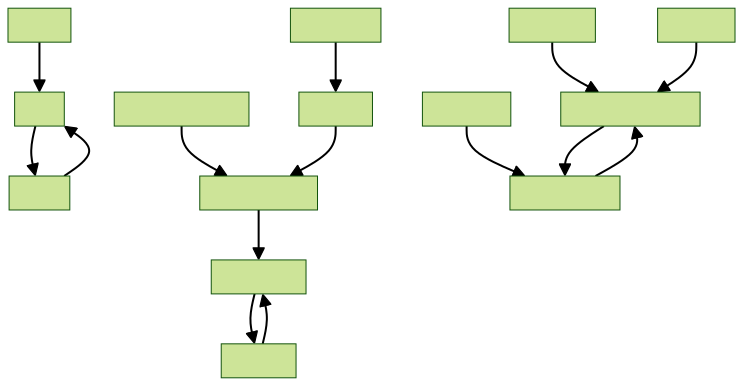

In [67]:
nearest-neighbor-graph(%locations-ne.pairs, distance-function => &geo-distance, format => 'mermaid')
==> { $mmd-theme ~ "\n" ~ $_ }()
==> mermaid-ink(format => 'svg', :$background)
==> { .subst('United_States.', '', :g)}()

The graph above was derived by using only one neighbor for each city -- its closest neighbor:

### Nearest neighbors via proximity disk

Alternatively, we can be make a graph based on the neighbors with a certain radius. 
Here we specify the making of such graph with all neighbors for each city that within 8 miles radius.
Note that we had to define the variant of `&geo-distance` in order to use mile-units:

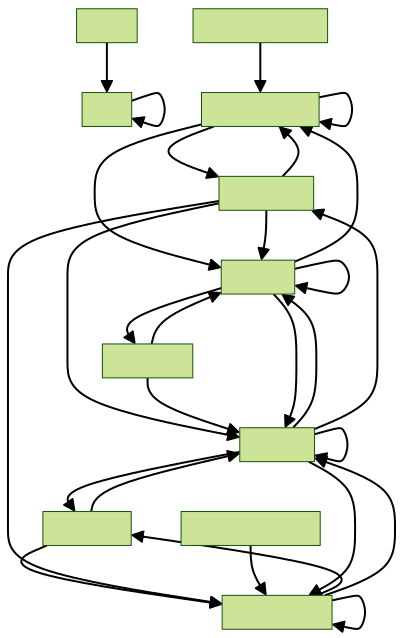

In [68]:
nearest-neighbor-graph(%locations-ne.pairs, (Whatever, 8), distance-function => { &geo-distance($^a, $^b, units => 'miles') }, format => 'mermaid')
==> { $mmd-theme ~ "\n" ~ $_ }()
==> mermaid-ink(format => 'svg', :$background)
==> { .subst('United_States.', '', :g)}()

Let us "verify" the graph by making the contingency table of distances. Here we compute the long form of the distances dataset, and then we cross-tabulate that dataset:

In [31]:
my @tbl = (%locations-ne X %locations-ne).map({ %( from => $_.head.key, to => $_.tail.key, distance => &geo-distance($_.head.value, $_.tail.value, units => 'miles').round(0.1) ) });
my @ct = cross-tabulate(@tbl, 'from', 'to', 'distance').sort(*.key);

deduce-type(@ct)

Vector(Pair(Atom((Str)), Assoc(Atom((Str)), Atom((Rat)), 14)), 14)

Here is contingency table in HTML:

In [32]:
#% html
@ct.map({ ['from' => $_.key , |$_.value].Hash }) ==> to-html(field-names => ['from', |@ct>>.key])


from,Carson,Enterprise,Henderson,Las_Vegas,North_Las_Vegas,Pahrump,Paradise,Reno,Sparks,Spring_Valley,Summerlin_South,Sunrise_Manor,Whitney,Winchester
Carson,0,329.5,337.2,317.8,322.8,286.5,329.9,22.3,28.8,323.8,319.7,329.2,333.2,327.6
Enterprise,329.5,0,10,14.7,19.6,47.5,6.2,345.4,347.2,6.1,9.8,14.5,11.4,9.5
Henderson,337.2,10,0,19.6,18.9,57.1,7.3,352.8,354.4,13.9,18.2,11.5,6.1,10
Las_Vegas,317.8,14.7,19.6,0,10.5,42.1,12.4,333.4,334.9,8.9,8.1,12.5,15.4,9.8
North_Las_Vegas,322.8,19.6,18.9,10.5,0,51.9,14.2,337.9,339.3,16,17.5,7.6,12.9,10.4
Pahrump,286.5,47.5,57.1,42.1,51.9,0,50.5,303.5,305.7,43.4,39.2,54.3,55.6,50.2
Paradise,329.9,6.2,7.3,12.4,14.2,50.5,0,345.5,347.2,7.1,11.3,8.4,5.7,3.9
Reno,22.3,345.4,352.8,333.4,337.9,303.5,345.5,0,7.5,339.7,335.6,344.4,348.6,343.1
Sparks,28.8,347.2,354.4,334.9,339.3,305.7,347.2,7.5,0,341.4,337.4,345.9,350.1,344.7
Spring_Valley,323.8,6.1,13.9,8.9,16,43.4,7.1,339.7,341.4,0,4.3,13.1,12.5,7.8


-------

## Future plans

A variety of improvements can be done in the presented packages. Some features need fundamental revisiting of the package implementations. The sub-sections below correspond to each package considered.

### Data::Geographics

### Data::Reshapers

### Math::Nearest

### JavaScript::D3

--------

## References

### Packages


[AAp1] Anton Antonov, [Data::Geographics Raku package](https://github.com/antononcube/Raku-Data-Geographics), (2024), [GitHub/antononcube](https://github.com/antononcube).

[AAp2] Anton Antonov, [Data::Reshapers Raku package](https://github.com/antononcube/Raku-Data-Reshapers), (2021-2024), [GitHub/antononcube](https://github.com/antononcube).

[AAp3] Anton Antonov, [Data::Summarizers Raku package](https://github.com/antononcube/Raku-Data-Summarizers), (2021-2023), [GitHub/antononcube](https://github.com/antononcube).

[AAp4] Anton Antonov, [Data::Translators Raku package](https://github.com/antononcube/Raku-Data-Translators), (2023-2024), [GitHub/antononcube](https://github.com/antononcube).

[AAp5] Anton Antonov, [Data::TypeSystem Raku package](https://github.com/antononcube/Raku-Data-TypeSystem), (2023-2024), [GitHub/antononcube](https://github.com/antononcube).

[AAp6] Anton Antonov, [DSL::Entity::Geographics Raku package](https://github.com/antononcube/Raku-DSL-Entity-Geographics), (2021-2024), [GitHub/antononcube](https://github.com/antononcube).

[AAp7] Anton Antonov, [Math::DistanceFunctions Raku package](https://github.com/antononcube/Raku-Math-DistanceFunctions), (2024), [GitHub/antononcube](https://github.com/antononcube).

[AAp8] Anton Antonov, [Math::Nearest Raku package](https://github.com/antononcube/Raku-Math-Nearest), (2024), [GitHub/antononcube](https://github.com/antononcube).

[AAp9] Anton Antonov, [JavaScript::D3 Raku package](https://github.com/antononcube/Raku-JavaScript-D3), (2022-2024), [GitHub/antononcube](https://github.com/antononcube).


### Videos

[AAv1] Anton Antonov, ["The Raku-ju hijack hack for D3.js"](https://www.youtube.com/watch?v=YIhx3FBWayo), (2022), [YouTube/@AAA4prediction](https://www.youtube.com/@AAA4prediction). (7 min.)

[AAv2] Anton Antonov, ["Random mandalas generation (with D3.js via Raku)"](https://www.youtube.com/watch?v=THNnofZEAn4), (2022), [YouTube/@AAA4prediction](https://www.youtube.com/@AAA4prediction). (2 min.)

[AAv3] Anton Antonov, ["Exploratory Data Analysis with Raku"](https://www.youtube.com/watch?v=YCnjMVSfT8w), (2024), [YouTube/@AAA4prediction](https://www.youtube.com/@AAA4prediction). (21 min.)